In [2]:
import pandas as pd
import numpy as np


file_path = 'your_data_cleaned.csv'
file = pd.read_csv(file_path)

def convert_fraction_to_scale(review):
    try:
        numerator, denominator = map(int, review.split('/'))
        return numerator / denominator
    except:
        return review

file['converted_review'] = file.apply(lambda row: convert_fraction_to_scale(row['0']), axis=1)

file[['0', 'converted_review']].to_csv(file_path, index=False)

file.info()
file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82815 entries, 0 to 82814
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   0                 82815 non-null  object 
 1   converted_review  82815 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


,0,converted_review
0,9/10,0.9
1,8/10,0.8
2,10/10,1.0
3,10/10,1.0
4,10/10,1.0


In [3]:
# import sklearn
# import os 
# os.system('sudo pip install scikit-learn')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [4]:
def fraction_to_sentiment(converted_review):
    if converted_review > 0.7:
        return 2
    elif converted_review > 0.4 and converted_review < 0.7:
        return 1
    else :
        return 0

file['sentiment'] = file['converted_review'].apply(fraction_to_sentiment)

file.head()

,0,converted_review,sentiment
0,9/10,0.9,2
1,8/10,0.8,2
2,10/10,1.0,2
3,10/10,1.0,2
4,10/10,1.0,2


In [5]:
file['sentiment'].value_counts()

sentiment
2    64981
0    10463
1     7371
Name: count, dtype: int64

In [6]:
X = file[['converted_review']]
y = file.sentiment
reviews_train, reviews_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [7]:
model.fit(reviews_train, sent_train)

LogisticRegression()

In [8]:
pred = model.predict(reviews_test)
print(pred)

[0 2 2 ... 2 0 2]


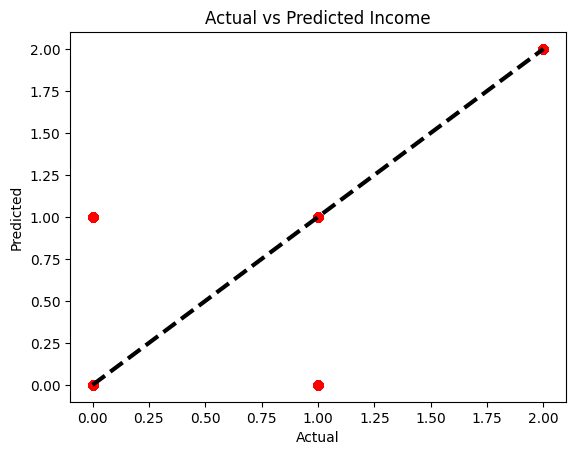

In [9]:
import matplotlib.pyplot as plt
plt.scatter(sent_test, pred, color='red')
plt.plot([sent_test.min(), sent_test.max()], [sent_test.min(), sent_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Income')
plt.show()

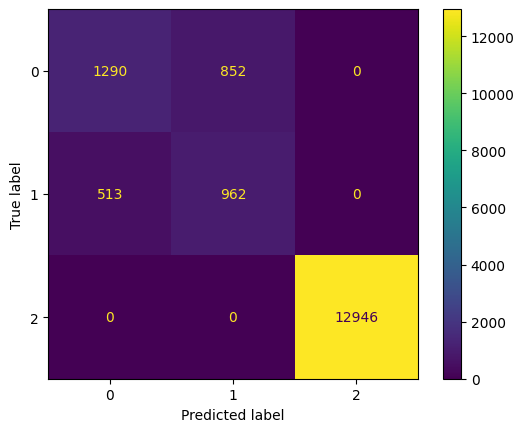

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, pred, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, sent_test)
print("Model Accuracy: {:.5f}%".format(acc*100))

Model Accuracy: 91.75874%
